## 1. 下载数据（json格式）

In [ ]:
# 在glassdoor网站下载职位数据（json格式），分别在['block-chain-engineer', 'cloud-engineer', 'data-engineer', 'devops-engineer', 'machine-learning-engineer','security-engineer', 'software', 'software-engineer', 'ui-engineer']共9个文件中
# download_data是在同级文件夹下的download.py文件中的一个函数。这里做了import导入。
# 注意：文件已经下载好，如果要演示，请不要执行这一个cell，否则会重新下载，覆盖原数据，可能会造成错误。
from download import download_data
download_data()

## 2. 按照规定的字段，提取数据

In [5]:
# 2.1  读取数据，最终形成一个job_all_info_extended_list列表。
"""
列表里面，是277个“职位组合”的字典。一般而言，每一个“职位组合”包含了20-30个职位。
列表里面的数据，是职位的全部信息。需要进一步提取目标信息。
"""
import json
files = ['software', 'block-chain-engineer', 'cloud-engineer', 'data-engineer', 'devops-engineer', 'machine-learning-engineer',
         'security-engineer', 'software-engineer', 'ui-engineer', 'software-developer']
job_all_info_list = []

def handle(final_list, cate):
    for di in final_list:
        di['cate'] = cate
    return final_list

for file in files:
    f = open(file, mode="r", encoding="utf-8")
    content = f.read()
    f.close()

    raw_list = content.split(']\n[')

    # for index, raw in enumerate(raw_list):
    #     print(index)
    #     if index == 0:
    #         final = raw + ']'
    #         r = json.loads(final)
    #         continue
    #     elif index == (len(raw_list) - 1):
    #         final = '[' + raw
    #         r = json.loads(final)
    #         continue
    #     else:
    #         final = '[' + raw + ']'
    #         r = json.loads(final)
    #
    #     input('>>')

    final_list = []
    for index, raw in enumerate(raw_list):
        if index == 0:
            final = raw + ']'
            final_list.append(handle(json.loads(final), file))
            continue
        elif index == (len(raw_list) - 1):
            final = '[' + raw
            final_list.append(handle(json.loads(final), file))
            continue
        else:
            final = '[' + raw + ']'
            final_list.append(handle(json.loads(final), file))
    job_all_info_list.extend(final_list)

job_all_info_extended_list = []
for job_list in job_all_info_list:
    for job_list_ in job_list:
        job_all_info_extended_list.append(job_list_)
print('job_all_info_extended_list的长度是： {}'.format(len(job_all_info_extended_list)))
print(job_all_info_extended_list[0])

job_all_info_extended_list的长度是： 277
{'data': {'jobListings': {'companyFilterOptions': [{'id': 2763, 'shortName': 'Deloitte', '__typename': 'Employer'}, {'id': 2916298, 'shortName': 'Contact Government Services', '__typename': 'Employer'}, {'id': 2496828, 'shortName': 'Recruiting from Scratch', '__typename': 'Employer'}, {'id': 4138, 'shortName': 'Accenture', '__typename': 'Employer'}, {'id': 6036, 'shortName': 'Amazon', '__typename': 'Employer'}, {'id': 8450, 'shortName': 'PwC', '__typename': 'Employer'}, {'id': 7116276, 'shortName': 'Yupulse', '__typename': 'Employer'}, {'id': 1138, 'shortName': 'Apple', '__typename': 'Employer'}, {'id': 2230881, 'shortName': 'TikTok', '__typename': 'Employer'}, {'id': 2867, 'shortName': 'KPMG', '__typename': 'Employer'}, {'id': 40772, 'shortName': 'Meta', '__typename': 'Employer'}, {'id': 1737, 'shortName': 'Oracle', '__typename': 'Employer'}, {'id': 730545, 'shortName': 'Leidos', '__typename': 'Employer'}, {'id': 5224839, 'shortName': 'JPMorgan Chas

In [6]:
# 2.2 将目标数据提取到 jobs_df（DataFrame格式）
import numpy as np
import pandas as pd

column_names = ['cate', 'JobTitle', 'CompanyName', 'Location', 'Url', 'p10_salary', 'p50_salary', 'p90_salary']
jobs_df = pd.DataFrame(columns=column_names)
for job_dict in job_all_info_extended_list:
    try:
        job_listings = job_dict['data']['jobListings']
    except:
        continue
    
    links = job_listings['jobListingSeoLinks']['linkItems']
    job_datas = job_listings['jobListings']
    
    num_of_jobs = len(job_datas)
    for index in range(num_of_jobs):
        url = links[index]['url']
        cate = job_dict['cate']
        job_title = job_datas[index]['jobview']['header']['jobTitleText']
        company_name = job_datas[index]['jobview']['header']['employer']['name']
        location = job_datas[index]['jobview']['header']['locationName']
        try:
            p10_salary = job_datas[index]['jobview']['header']['payPeriodAdjustedPay']['p10']
            p50_salary = job_datas[index]['jobview']['header']['payPeriodAdjustedPay']['p50']
            p90_salary = job_datas[index]['jobview']['header']['payPeriodAdjustedPay']['p90']
        except:
            continue

        new_row = {'cate': cate, 'JobTitle': job_title, 'CompanyName': company_name, 'Location': location, 'Url': url, 'p10_salary': p10_salary, 'p50_salary': p50_salary, 'p90_salary': p90_salary}
        # 使用append方法将新行添加到DataFrame中，注意要使用ignore_index=True来自动重新索引  
        jobs_df = jobs_df.append(new_row, ignore_index=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1328\1045372821.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jobs_df = jobs_df.append(new_row, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1328\1045372821.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jobs_df = jobs_df.append(new_row, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1328\1045372821.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jobs_df = jobs_df.append(new_row, ignore_index=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1328\1045372821.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  j

In [7]:
# 2.3 展示提取数据的前5个。
jobs_df.head(5)

,cate,JobTitle,CompanyName,Location,Url,p10_salary,p50_salary,p90_salary
0,software,Software Engineers I,Hadiamondstar Software Solutions LLC,"Fairfax, VA",https://www.glassdoor.com/job-listing/software...,94632,111196,130659
1,software,Junior Software Developer,"STI Technologies, Inc","Fairborn, OH",https://www.glassdoor.com/job-listing/junior-s...,36729,46626,59190
2,software,Software Developer,Vexcel Imaging GmbH,"Jacksonville, FL",https://www.glassdoor.com/job-listing/software...,65350,82223,103453
3,software,Junior Software Developer,nuArch,"New York, NY",https://www.glassdoor.com/job-listing/junior-s...,60000,70000,80000
4,software,Software Engineer (Frontend),Aerostrat,United States,https://www.glassdoor.com/job-listing/software...,80000,110000,140000


In [9]:
# 2.4 显示数据矩阵的大小
"""
共6410个职位，各有8个字段
"""
jobs_df.shape

(6410, 8)

## 3.可视化

In [10]:

# 3.1 对Location列进行分裂，提取所在州的信息，并写入新列 “LocationStates”
def split_for_states(loc):
    # 美国所有州的缩写列表
    states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
    if loc.strip() == 'Remote':
        return 'Remote'
    elif loc.strip() == 'United States':
        return 'United States'  
    elif ',' in loc:
        last_comma_index = loc.rfind(',')
        part2 = loc[last_comma_index + 1:].strip()
        if part2 in states:
            return part2
        else:
            return 'N/A'
    else:
        return 'N/A'
    
jobs_df['LocationStates'] = jobs_df['Location'].apply(split_for_states)


In [11]:
# 3.2 查看添加新列后的表格
jobs_df

,cate,JobTitle,CompanyName,Location,Url,p10_salary,p50_salary,p90_salary,LocationStates
0,software,Software Engineers I,Hadiamondstar Software Solutions LLC,"Fairfax, VA",https://www.glassdoor.com/job-listing/software...,94632,111196,130659,VA
1,software,Junior Software Developer,"STI Technologies, Inc","Fairborn, OH",https://www.glassdoor.com/job-listing/junior-s...,36729,46626,59190,OH
2,software,Software Developer,Vexcel Imaging GmbH,"Jacksonville, FL",https://www.glassdoor.com/job-listing/software...,65350,82223,103453,FL
3,software,Junior Software Developer,nuArch,"New York, NY",https://www.glassdoor.com/job-listing/junior-s...,60000,70000,80000,NY
4,software,Software Engineer (Frontend),Aerostrat,United States,https://www.glassdoor.com/job-listing/software...,80000,110000,140000,United States
...,...,...,...,...,...,...,...,...,...
6405,software-developer,Software Engineer I - 402,COCC,"Southington, CT",https://www.glassdoor.com/job-listing/software...,90000,97500,105000,CT
6406,software-developer,Backend Software Developer,PowerPay LLC,"King of Prussia, PA",https://www.glassdoor.com/job-listing/backend-...,90102,112808,141235,PA
6407,software-developer,Junior Software Engineer,BlueHalo,"Huntsville, AL",https://www.glassdoor.com/job-listing/junior-s...,57766,75568,98855,AL
6408,software-developer,Software Developer -WordPress,"Palitto Consulting Services, Inc.","Wadsworth, OH",https://www.glassdoor.com/job-listing/software...,69863,88975,113314,OH


In [12]:
jobs_df.to_csv('jobs_df.csv', index=False)

In [ ]:
# 以下是python中的可视化。d3.js的可视化，参见html中的代码。

In [8]:
# 3.3 查看新列有多少不同的值
jobs_df['LocationStates'].unique()

array(['VA', 'OH', 'FL', 'NY', 'United States', 'Remote', 'PA', 'CA',
       'GA', 'N/A', 'TX', 'MD', 'MA', 'CT', 'NC', 'WA', 'CO', 'AL', 'TN',
       'MN', 'NH', 'MO', 'IL', 'AZ', 'ND', 'MI', 'NJ', 'OR', 'SC', 'UT',
       'LA', 'NE', 'WI', 'MS', 'NM', 'AR', 'IA', 'ID', 'IN', 'OK', 'VT',
       'NV', 'KS', 'SD', 'HI', 'RI', 'KY', 'AK', 'WY', 'ME', 'DE', 'WV',
       'MT'], dtype=object)

In [9]:
# 3.4 查看新列各个值的个数
states_distribution = jobs_df['LocationStates'].value_counts()
states_distribution

CA               1138
TX                452
VA                433
MD                331
United States     315
MA                271
WA                251
FL                230
NJ                220
GA                213
Remote            195
IL                188
N/A               188
NY                180
NC                162
MI                160
PA                152
OH                146
CO                115
MN                 99
AZ                 85
UT                 81
CT                 73
AL                 66
WI                 66
MO                 65
TN                 55
IN                 39
NE                 39
AR                 35
IA                 35
NV                 33
OR                 28
KS                 28
NM                 28
KY                 23
ID                 22
OK                 19
SC                 19
LA                 18
RI                 17
NH                 16
ME                 15
MS                 14
SD                 10
ND        

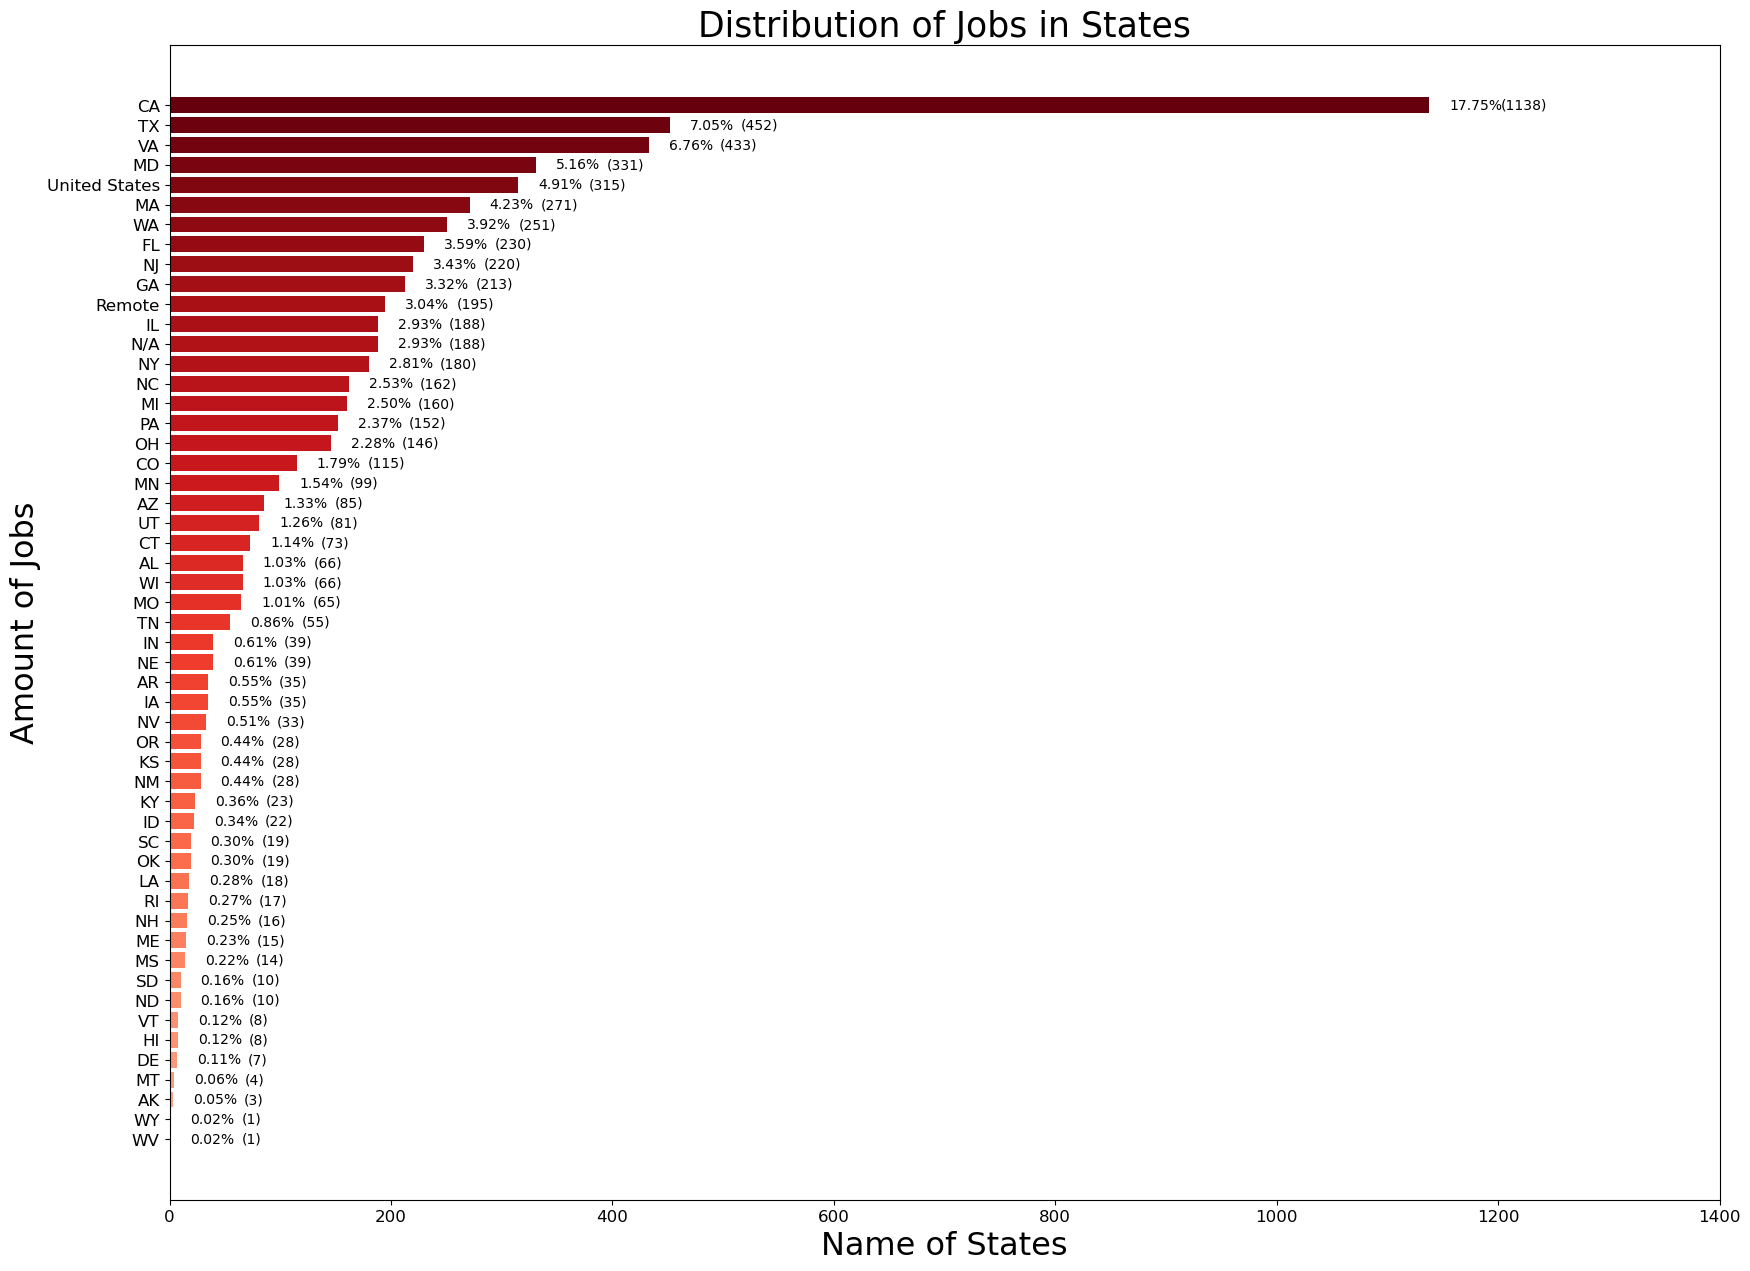

In [10]:
# 3.5  导入matplotlib模块，绘制 各州的工作职位分布条形图
import matplotlib.pyplot as plt

# 设置图片大小
plt.figure(figsize=(20, 15))
# 对Series从大到小进行排序
sorted_data = states_distribution.sort_values()

# 计算职位总数  
total_count = sorted_data.sum()

# 创建一个颜色列表，用于反映从小到大的变化  
colors = plt.cm.Reds(np.linspace(0.3, 1, len(sorted_data)))

# 绘制条形图，注意barh表示绘制水平条形图  
plt.barh(sorted_data.index, sorted_data.values, color=colors)

# 对各州的职位情况进行遍历，设置颜色
for i, (name, count) in enumerate(sorted_data.items()):
    # 显示比例  
    percentage = f'{count / total_count:.2%}'
    plt.text(count + 18, name, percentage, va='center')
    plt.text(count + 64, name, '(' + str(count) + ')', va='center')

# 设置x轴和y轴的标签  
plt.xlabel('Name of States', fontsize=23)
plt.ylabel('Amount of Jobs', fontsize=23)
plt.title('Distribution of Jobs in States', fontsize=25)
plt.tick_params(axis='both', labelsize=12)
plt.xlim(0, 1400)
# 显示图形  
plt.show()

ModuleNotFoundError: No module named 'geopandas'